In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


### Dataset Attributes

Here is the description of all the variables :

- Variable: Definition
- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day_of_week: Day of week of contact
- duration: Contact duration
- campaign: number of contacts performed during this campaign to the client
- pdays: number of days that passed by after the client was last contacted
- previous: number of contacts performed before this campaign
- poutcome: outcome of the previous marketing campaign

In [5]:
df.shape

(31647, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

**Observation:** The data is free of null values and duplicate rows. So no need to remove any rows.

In [8]:
# Drop 'ID' column because it is irrelevant
df.drop(columns='ID', inplace=True)

**Observation:** No significant correlation is found between any of the numeric columns except, 'pdays' and 'previous'.

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


<Axes: xlabel='job'>

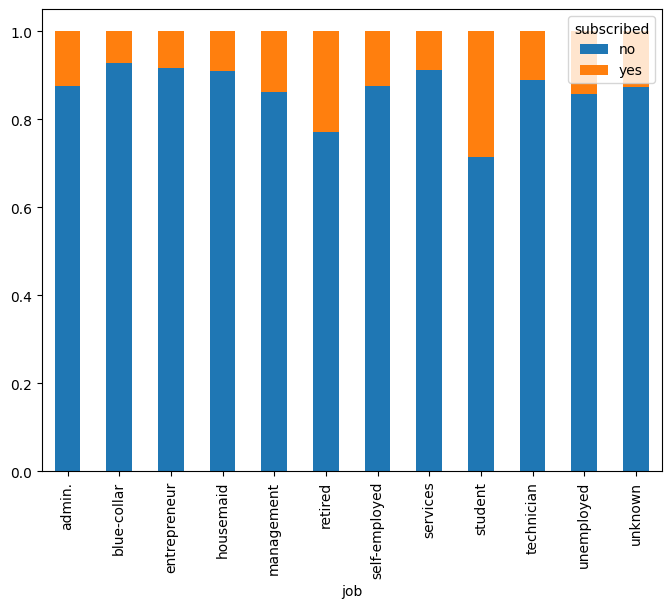

In [10]:
job = pd.crosstab(df['job'],df['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6))

**Observations:** Proportion of people who invest in Term Deposit is most in case of people belonging to management sector, who are retired or students. Blue collar people are least likely to do Term deposit. But these may be subject to the no. of observations each type.

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

<Axes: xlabel='marital'>

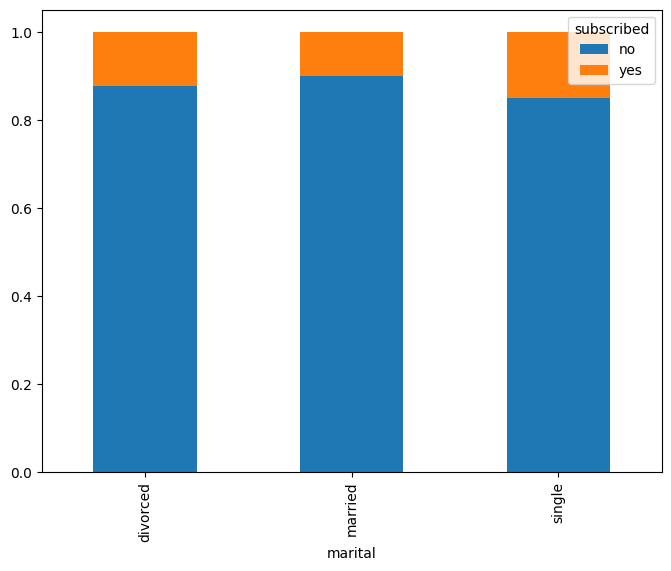

In [12]:
marital_status = pd.crosstab(df['marital'],df['subscribed'])
marital_status = marital_status.div(marital_status.sum(1).astype(float), axis=0)
marital_status.plot.bar(stacked=True,figsize=(8,6))

**Observation:** Single people are more likely to make a Term deposit as compared to married and divorced people.

C:\Users\Anubhav Prasad\AppData\Local\Temp\ipykernel_92508\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

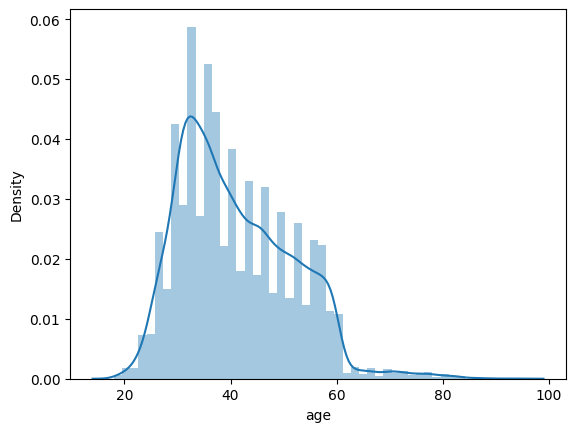

In [13]:
sns.distplot(df['age'])

**Observation:** We can infer that most of the potential clients lie in the age bracket of 20-60 years of age with the distribution being right skewed.

In [14]:
dflt = pd.crosstab(df['default'], df['subscribed'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

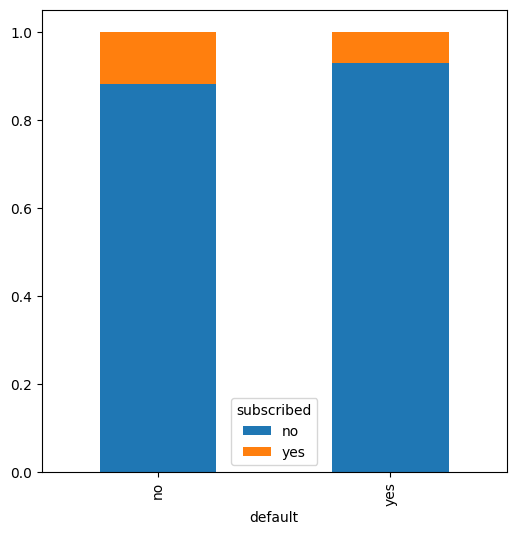

In [15]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

**Observation**: We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [16]:
# Converting the target variables into 0s and 1s
df['subscribed']= df['subscribed'].map({'yes':1, 'no': 0})
df.subscribed

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [17]:
#Correlation matrix
tc = df.select_dtypes(exclude='object').corr()
tc

,age,balance,day,duration,campaign,pdays,previous,subscribed
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

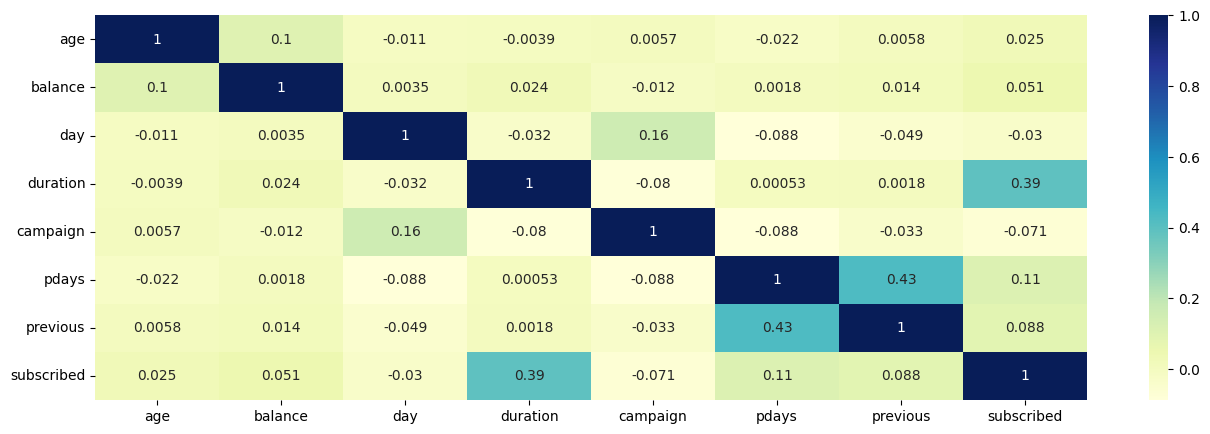

In [18]:
fig,ax= plt.subplots()
fig.set_size_inches(16,5)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

**Observation:** We can infer that duration of the call is significantly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

In [19]:
# Now lets encode the category columns
cat_enc = pd.get_dummies(df[['job', 'marital', 'housing', 'loan', 'month', 'poutcome', 'subscribed', 'education', 'default', 'contact']], drop_first= True).astype('int64')
df2 = df.drop(['job', 'marital', 'housing', 'loan', 'month', 'poutcome', 'subscribed','education', 'default', 'contact' ], axis = 1)
df_final = pd.concat([df2, cat_enc], axis =1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  31647 non-null  int64
 1   balance              31647 non-null  int64
 2   day                  31647 non-null  int64
 3   duration             31647 non-null  int64
 4   campaign             31647 non-null  int64
 5   pdays                31647 non-null  int64
 6   previous             31647 non-null  int64
 7   subscribed           31647 non-null  int64
 8   job_blue-collar      31647 non-null  int64
 9   job_entrepreneur     31647 non-null  int64
 10  job_housemaid        31647 non-null  int64
 11  job_management       31647 non-null  int64
 12  job_retired          31647 non-null  int64
 13  job_self-employed    31647 non-null  int64
 14  job_services         31647 non-null  int64
 15  job_student          31647 non-null  int64
 16  job_technician       3

In [20]:
#Now lets split the data set to train and test sets.
x = df_final.drop('subscribed', axis = 1)
y = df_final['subscribed']
mm = MinMaxScaler()
x = mm.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state=42)

In [28]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [22]:
y.value_counts()

subscribed
0    27932
1     3715
Name: count, dtype: int64

**Observation:** Since the target column is highly imbalanced. Let's try some techniques to treat this class imbalance

## Logistic Regression

In [486]:
from sklearn.linear_model import LogisticRegression

In [506]:
# creating an object of logistic regression model with assigning class weights
lreg = LogisticRegression(class_weight={0:1, 1:5})

In [507]:
# fitting the data into the model
lreg.fit(x_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 5})

In [508]:
# Making predictions on the validation set
test_pred = lreg.predict(x_test)
train_pred = lreg.predict(x_train)

In [509]:
# Calculating the accuracy score
print('Train Scores---')
print('Accuracy Score:',accuracy_score(y_train,train_pred))
print('Recall:', recall_score(y_train,train_pred))
print('F1 Score:', f1_score(y_train,train_pred))
print('Precision:', precision_score(y_train,train_pred))
print('\n')
print('Test Scores---')
print('Accuracy Score:',accuracy_score(y_test,test_pred))
print('Recall:', recall_score(y_test,test_pred))
print('F1 Score:', f1_score(y_test,test_pred))
print('Precision:', precision_score(y_test,test_pred))

Train Scores---
Accuracy Score: 0.8750641861199984
Recall: 0.739946380697051
F1 Score: 0.5826626203984695
Precision: 0.48052230685527747


Test Scores---
Accuracy Score: 0.8655608214849921
Recall: 0.7291381668946648
F1 Score: 0.5560772039645279
Precision: 0.4494097807757167


## Fitting Decsion Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
param_dist = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'criterion': ['gini', 'entropy']
}

In [25]:
dt = DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:5})
random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='recall', random_state=42, n_jobs=-1)

In [26]:
random_search_dt.fit(x_train, y_train)
best_dt1 = random_search_dt.best_estimator_

In [29]:
y_pred_train = best_dt1.predict(x_train)
y_pred_test = best_dt1.predict(x_test)

print("Best Hyperparameters:", random_search_dt.best_params_)
print("\nTraining Set Metrics:")
print("Recall:", recall_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))

print("\nTesting Set Metrics:")
print("Recall:", recall_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))


Best Hyperparameters: {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'entropy'}

Training Set Metrics:
Recall: 0.8927613941018767
Accuracy: 0.8519176837697989
Precision: 0.43722304283604135
F1 Score: 0.5869780764569792

Testing Set Metrics:
Recall: 0.8221614227086184
Accuracy: 0.8257503949447077
Precision: 0.3818297331639136
F1 Score: 0.5214750542299349


## Trying out SMOTE for Decision Tree Classifier

In [526]:
# Initialize SMOTE with custom parameters
smote = SMOTE(
    sampling_strategy=0.5,  # Target a 1:2 ratio of minority to majority class samples
    random_state=42,        # Ensure reproducibility
    k_neighbors=10,         # Use 10 nearest neighbors for generating synthetic samples
    n_jobs=-1               # Use all available CPU cores
)

# Apply SMOTE to the training set
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

c:\Users\Anubhav Prasad\anaconda3\envs\py3115\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [527]:
param_dist = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='recall', random_state=42, n_jobs=-1)

random_search.fit(X_resampled, y_resampled)
best_dt = random_search.best_estimator_

In [523]:
y_pred_train = best_dt.predict(X_resampled)
y_pred_test = best_dt.predict(x_test)

In [525]:
print("Best Hyperparameters:", random_search.best_params_)
print("\nTraining Set Metrics:")
print("Recall:", recall_score(y_resampled, y_pred_train))
print("Accuracy:", accuracy_score(y_resampled, y_pred_train))
print("Precision:", precision_score(y_resampled, y_pred_train))
print("F1 Score:", f1_score(y_resampled, y_pred_train))

print("\nTesting Set Metrics:")
print("Recall:", recall_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))

Best Hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 14, 'max_depth': 1, 'criterion': 'entropy'}

Training Set Metrics:
Recall: 0.8484685652874798
Accuracy: 0.7067673661900356
Precision: 0.5381425731326328
F1 Score: 0.6585798199575962

Testing Set Metrics:
Recall: 0.7633378932968536
Accuracy: 0.6505529225908373
Precision: 0.21486330381209087
F1 Score: 0.33533653846153844


## Fitting Random Forrest Classifier

In [447]:
from sklearn.ensemble import RandomForestClassifier

In [448]:
param_dist = {
    'n_estimators': range(20, 301, 50),
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [518]:
rf = RandomForestClassifier(random_state=42, class_weight={0:1, 1:5})
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='recall', random_state=42, n_jobs=-1)

In [519]:
random_search.fit(x_train, y_train)
best_rf = random_search.best_estimator_

In [520]:
y_pred_train = best_rf.predict(x_train)
y_pred_test = best_rf.predict(x_test)

print("Best Hyperparameters:", random_search.best_params_)
print("\nTraining Set Metrics:")
print("Recall:", recall_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))

print("\nTesting Set Metrics:")
print("Recall:", recall_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))


Best Hyperparameters: {'min_samples_split': 7, 'min_samples_leaf': 19, 'max_depth': 20, 'criterion': 'entropy'}

Training Set Metrics:
Recall: 0.8736595174262735
Accuracy: 0.8844649840028439
Precision: 0.5057225994180408
F1 Score: 0.6406192406929598

Testing Set Metrics:
Recall: 0.7852257181942545
Accuracy: 0.8579778830963665
Precision: 0.43617021276595747
F1 Score: 0.5608207132388862


In [457]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [459]:
brf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(brf, param_distributions=param_dist, n_iter=100, cv=5, scoring='recall', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
best_brf = random_search.best_estimator_

In [461]:
y_pred_test = best_brf.predict(x_test)
y_pred_train = best_brf.predict(x_train)

In [456]:
print("Best Hyperparameters:", random_search.best_params_)
print("\nTraining Set Metrics:")
print("Recall:", recall_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))

print("\nTesting Set Metrics:")
print("Recall:", recall_score(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))


Training Set Metrics:
Recall: 0.9996648793565683
Accuracy: 0.9999605008492317
Precision: 1.0
F1 Score: 0.9998324115971174

Testing Set Metrics:
Recall: 0.387140902872777
Accuracy: 0.904739336492891
Precision: 0.6461187214611872
F1 Score: 0.48417450812660395


## Decision Tree is giving the best performance with respect to **Recall** and **F1 Score** which is imperative to us in this problem.

In [30]:
test = pd.read_csv('test.csv')
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [31]:
test.drop(columns='ID', inplace=True)
test.shape

(13564, 16)

In [32]:
cat_enc = pd.get_dummies(test[['job', 'marital', 'housing', 'loan', 'month', 'poutcome', 'education', 'default', 'contact']], drop_first= True).astype('int64')
df2 = test.drop(['job', 'marital', 'housing', 'loan', 'month', 'poutcome', 'education', 'default', 'contact' ], axis = 1)
test_final = pd.concat([df2, cat_enc], axis =1)
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  13564 non-null  int64
 1   balance              13564 non-null  int64
 2   day                  13564 non-null  int64
 3   duration             13564 non-null  int64
 4   campaign             13564 non-null  int64
 5   pdays                13564 non-null  int64
 6   previous             13564 non-null  int64
 7   job_blue-collar      13564 non-null  int64
 8   job_entrepreneur     13564 non-null  int64
 9   job_housemaid        13564 non-null  int64
 10  job_management       13564 non-null  int64
 11  job_retired          13564 non-null  int64
 12  job_self-employed    13564 non-null  int64
 13  job_services         13564 non-null  int64
 14  job_student          13564 non-null  int64
 15  job_technician       13564 non-null  int64
 16  job_unemployed       1

In [35]:
test_df_pred = best_dt1.predict(test_final)
test_df_pred=pd.DataFrame(test_df_pred)
test_df_pred.to_csv('submission.csv', header=True, index=False)

c:\Users\Anubhav Prasad\anaconda3\envs\py3115\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
